# Sales Trends Forecasting - Exploratory Data Analysis

This notebook focuses on:
1. Data cleaning and preprocessing
2. Date columns conversion
3. Geographical analysis of sales (by country and city)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
# plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 6]

# Read the data
df = pd.read_csv('../data/train.csv')

## 1. Data Cleaning and Preprocessing

In [2]:
# Display initial info about the dataset
print("Initial Dataset Info:")
print("-" * 50)
df.info()

print("\nMissing Values:")
print("-" * 50)
print(df.isnull().sum())

print("\nDuplicate Rows:")
print("-" * 50)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Initial Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non

In [3]:
# Clean the data
# 1. Handle missing values
df['Postal Code'] = df['Postal Code'].fillna(df['Postal Code'].mode()[0])

# 2. Convert date columns
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', dayfirst=True)

# 3. Create additional date features
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.quarter

# Display cleaned data info
print("Cleaned Dataset Info:")
print("-" * 50)
df.info()

Cleaned Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14 

## 2. Save Cleaned Data

In [4]:
# Save the cleaned dataset
df.to_csv('../data/cleaned_sales_data.csv', index=False)
print("Cleaned data saved successfully!")

Cleaned data saved successfully!


## 3. Geographical Sales Analysis

Sales Statistics by Country:
--------------------------------------------------
                 mean  count         sum
Country                                 
United States  230.77   9800  2261536.78


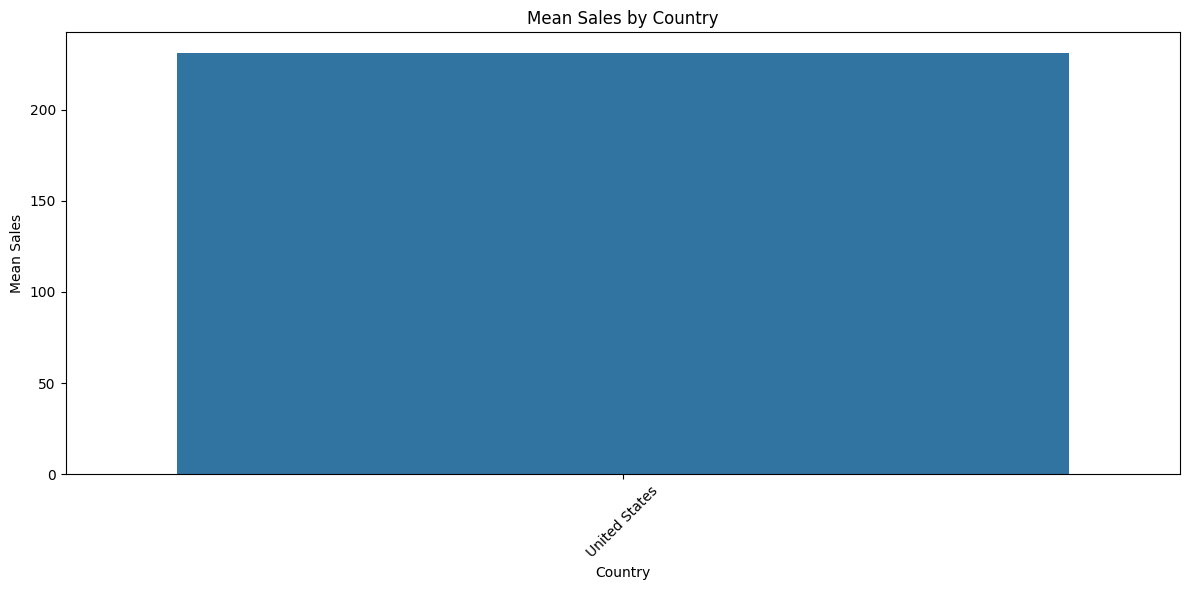

In [5]:
# Analysis by Country
country_sales = df.groupby('Country')['Sales'].agg(['mean', 'count', 'sum']).round(2)
country_sales = country_sales.sort_values('sum', ascending=False)

print("Sales Statistics by Country:")
print("-" * 50)
print(country_sales)

# Visualize mean sales by country
plt.figure(figsize=(12, 6))
sns.barplot(data=country_sales.reset_index(), x='Country', y='mean')
plt.title('Mean Sales by Country')
plt.xlabel('Country')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 15 Cities by Total Sales:
--------------------------------------------------
                               mean  count        sum
Country       City                                   
United States New York City  283.35    891  252462.55
              Los Angeles    238.21    728  173420.18
              Seattle        272.55    426  116106.32
              San Francisco  218.08    500  109041.12
              Philadelphia   204.59    532  108841.75
              Houston        171.01    374   63956.14
              Chicago        155.26    308   47820.13
              San Diego      279.54    170   47521.03
              Jacksonville   357.71    125   44713.18
              Detroit        369.10    115   42446.94
              Springfield    259.80    161   41827.81
              Columbus       174.94    221   38662.56
              Newark         309.22     92   28448.05
              Columbia       312.14     81   25283.32
              Jackson        304.44     82   24963.86


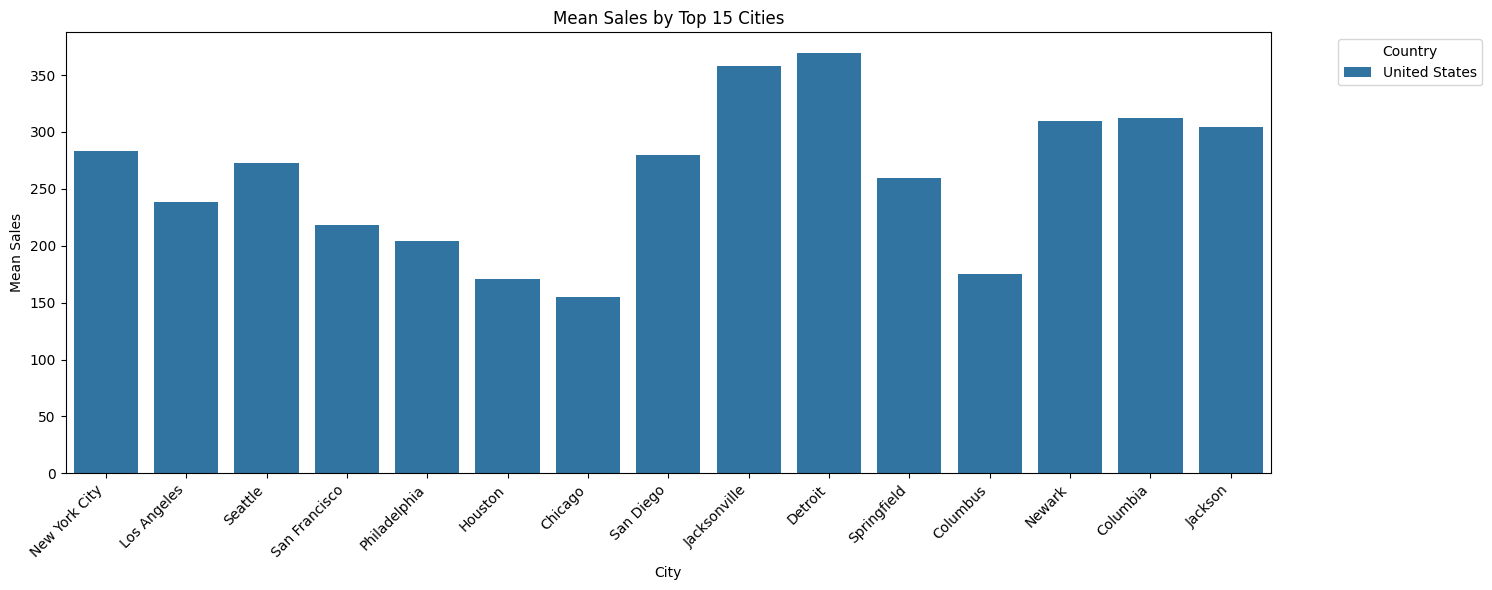

In [6]:
# Analysis by City (top 15 cities)
city_sales = df.groupby(['Country', 'City'])['Sales'].agg(['mean', 'count', 'sum']).round(2)
city_sales = city_sales.sort_values('sum', ascending=False).head(15)

print("Top 15 Cities by Total Sales:")
print("-" * 50)
print(city_sales)

# Visualize mean sales by top 15 cities
plt.figure(figsize=(15, 6))
city_data = city_sales.reset_index()
sns.barplot(data=city_data, x='City', y='mean', hue='Country')
plt.title('Mean Sales by Top 15 Cities')
plt.xlabel('City')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

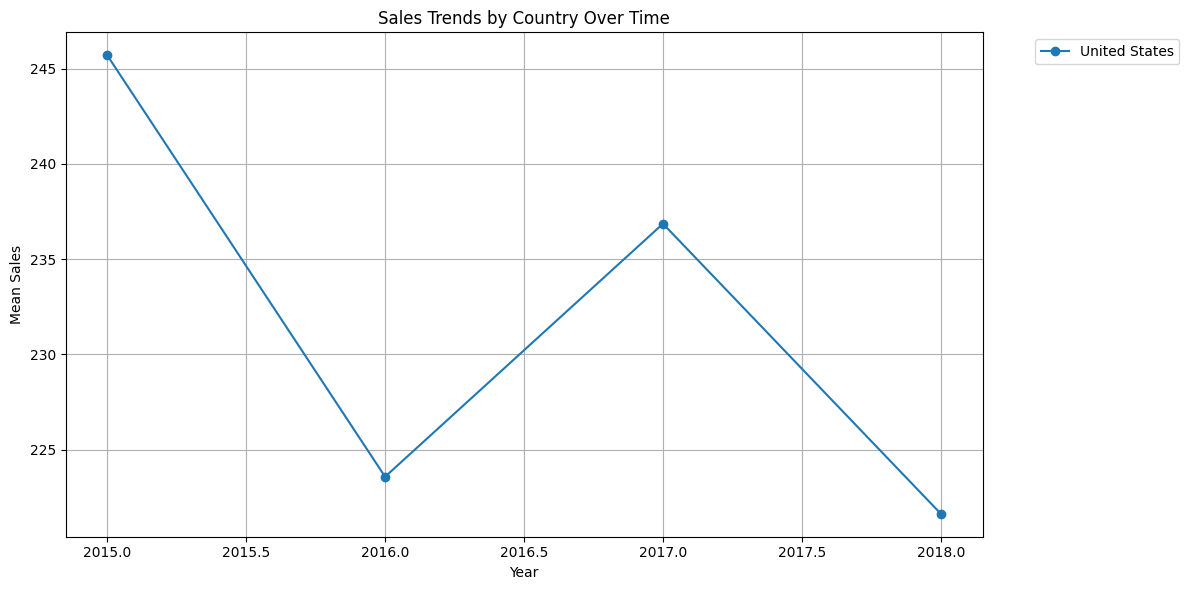

In [7]:
# Sales trends over time by country
time_country_sales = df.groupby(['Order Year', 'Country'])['Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))
for country in df['Country'].unique():
    country_data = time_country_sales[time_country_sales['Country'] == country]
    plt.plot(country_data['Order Year'], country_data['Sales'], marker='o', label=country)

plt.title('Sales Trends by Country Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()